<h1><center> Example simulation run for JuliaSEM

<h4> 

* Go to src/parameters/defaultParameters.jl and modify the values as required


* Go to src/initialConditions/defaultInitialConditions.jl and modify the values as required


* Go to run.jl and change the name the simulation

In [ ]:
@time include("run.jl")

<h4> 

* The output for this simulation is stored in data/file.jld.


* Output has four matrices:
</h4>

<b>Slip</b>: the cumulative slip on the fault at every timestep.  
<b>SlipVel</b>: the slip velocity on the fault at every timestep.  
<b>Stress</b>: The shear stress on the fault at every timestep.  
<b>time_</b>: the timesteps.

The vertical dimension of the matrices is the depth dimension, and the horizontal dimension is the time series.

In [21]:
# Include packages if you want to load from file
using JLD2
using FileIO

@load "data/dump01.jld2"

┌ Warning: type results does not exist in workspace; reconstructing
└ @ JLD2 /Users/prithvithakur/.julia/packages/JLD2/IASHd/src/data.jl:1153


3-element Array{Symbol,1}:
 :output         
 :simulation_time
 :name           

In [22]:
# Create parameter and setup objects
include("src/parameters/defaultParameters.jl")
include("src/setup.jl")
P = parameters()
S = setup(P);

In [23]:
name = "/dump01"
dir = pwd()

"/Users/prithvithakur/everything/JuliaSEMCycle"

<h4> Include scripts for calculating cumulative slip every 2 years during interseismic, and every 1 sec during seismic period

In [24]:
include("scripts/cumulative-slip.jl")

cumSlip (generic function with 1 method)

In [25]:
delfsec, delf5yr = cumSlip(output.Slip, output.SlipVel, output.time_);

<h4> Include plots file, and plot the results

In [26]:
include("scripts/plots.jl")

cumSlipPlot (generic function with 1 method)

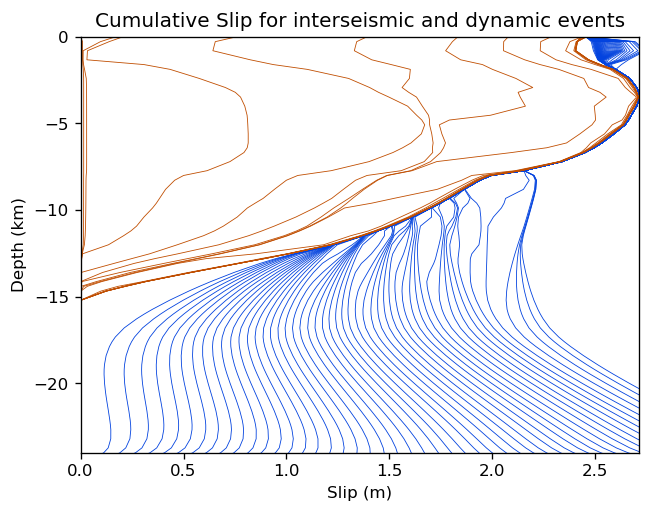

In [27]:
cumSlipPlot(delfsec, delf5yr, S.FltX)

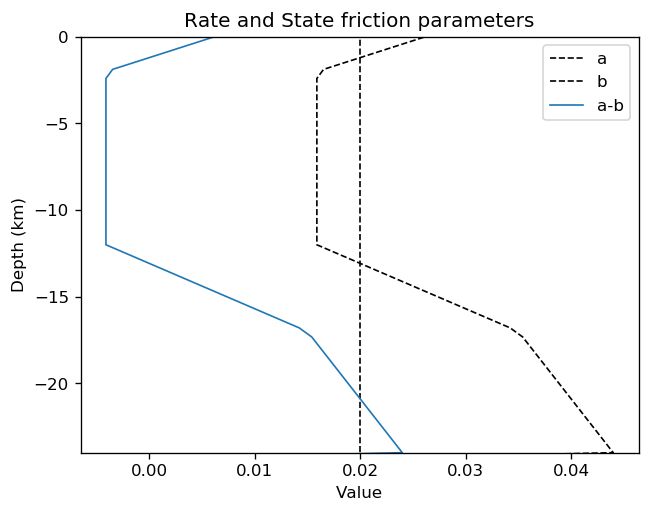

In [28]:
fricPlot(S.cca, S.ccb, S.FltX)

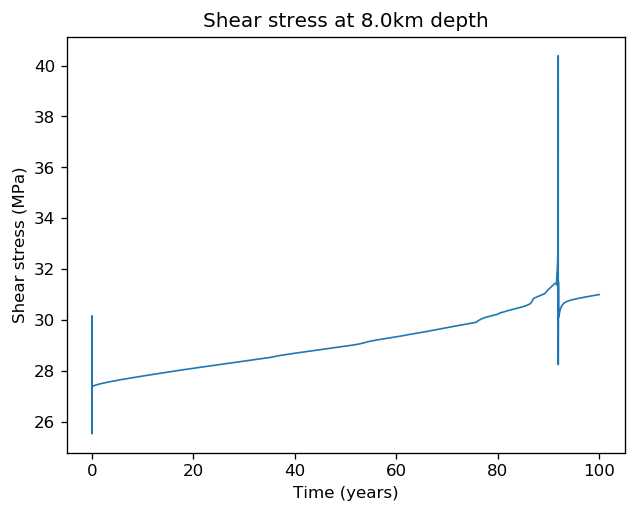

In [29]:
stressPlot(output.Stress, output.time_, S.FltX, P.yr2sec)

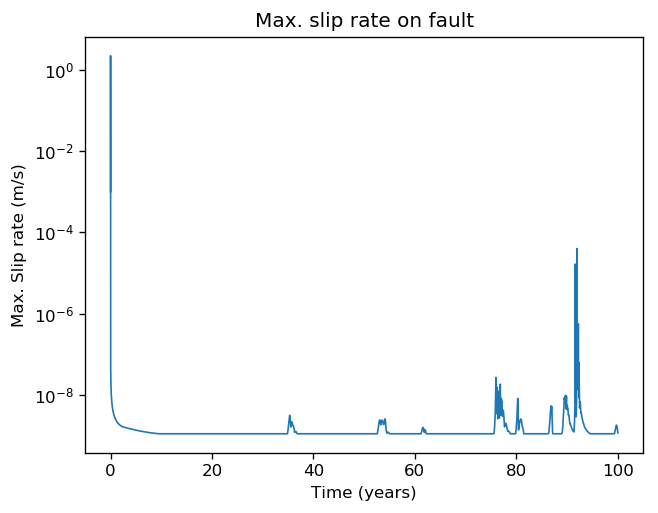

In [30]:
VfmaxPlot(output.SlipVel, output.time_, P.yr2sec)
#xlim([124, 127])

In [ ]:
simulation_time = 9620

In [ ]:
@load fname b

In [ ]:
using JLD2

In [ ]:
fname = string("ddd.jld2")

In [ ]:
struct blah
    simu::Int
end

In [ ]:
b = blah(25)

In [ ]:
b